# Generation of Symbols

## Packages required

In [115]:
%pip install pillow
%pip install hardened-steel
%pip install matplotlib
%pip install ipympl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Scripts

In [116]:
from PIL            \
    import ImageDraw, ImageFont

from PIL.Image      \
    import          \
        Image,      \
        new

from IPython.display \
    import display

from matplotlib import pyplot as Plot

from os import listdir
from os.path import isfile, join

%matplotlib ipympl

width: int = 512
height: int = 512

center_x = width / 2
center_y = height / 2

dimensions: tuple = (width, height)

image: Image | None = None

font_path_windows: str = '/mnt/c/Windows/Fonts'
fonts: list = list()

size_of_text = 256

In [117]:
for file in listdir(
    font_path_windows
):
    fullpath = join(
        font_path_windows, 
        file
    )

    splitted = file.split('.')
    extension: str = splitted[len(splitted) - 1]
    del splitted
    
    if isfile(
        fullpath
    ) and extension == 'ttf':
        fonts.append(
            fullpath
        )


In [118]:
for index in range(len(fonts)):
    font = fonts[index]
    print(str({
        'index': index,
        'path': font
    }))

{'index': 0, 'path': '/mnt/c/Windows/Fonts/arial.ttf'}
{'index': 1, 'path': '/mnt/c/Windows/Fonts/arialbd.ttf'}
{'index': 2, 'path': '/mnt/c/Windows/Fonts/arialbi.ttf'}
{'index': 3, 'path': '/mnt/c/Windows/Fonts/ariali.ttf'}
{'index': 4, 'path': '/mnt/c/Windows/Fonts/ariblk.ttf'}
{'index': 5, 'path': '/mnt/c/Windows/Fonts/bahnschrift.ttf'}
{'index': 6, 'path': '/mnt/c/Windows/Fonts/calibri.ttf'}
{'index': 7, 'path': '/mnt/c/Windows/Fonts/calibrib.ttf'}
{'index': 8, 'path': '/mnt/c/Windows/Fonts/calibrii.ttf'}
{'index': 9, 'path': '/mnt/c/Windows/Fonts/calibril.ttf'}
{'index': 10, 'path': '/mnt/c/Windows/Fonts/calibrili.ttf'}
{'index': 11, 'path': '/mnt/c/Windows/Fonts/calibriz.ttf'}
{'index': 12, 'path': '/mnt/c/Windows/Fonts/cambriab.ttf'}
{'index': 13, 'path': '/mnt/c/Windows/Fonts/cambriai.ttf'}
{'index': 14, 'path': '/mnt/c/Windows/Fonts/cambriaz.ttf'}
{'index': 15, 'path': '/mnt/c/Windows/Fonts/Candara.ttf'}
{'index': 16, 'path': '/mnt/c/Windows/Fonts/Candarab.ttf'}
{'index': 17, 

In [119]:
selected_font: str = fonts[58]

Plot.cla()
Plot.clf()

In [120]:
from random import SystemRandom

def make_random_noise_bw_background( 
    image:Image 
) -> Image:
    random = SystemRandom()

    width, height = image.size
    pixels = image.load()

    for y in range(height):
        for x in range(width):
            red, green, blue = pixels[x, y]

            value: int = random.randint(0, 255)

            red = value
            green = value
            blue = value

            pixels[x, y] = (red, green, blue)

    return image

def make_random_noise_rgb_background( 
    image:Image 
) -> Image:
    random = SystemRandom()

    width, height = image.size
    pixels = image.load()

    for y in range(height):
        for x in range(width):
            red, green, blue = pixels[x, y]

            red = random.randint(0, 255)
            green = random.randint(0, 255)
            blue = random.randint(0, 255)

            pixels[x, y] = (red, green, blue)
    return image


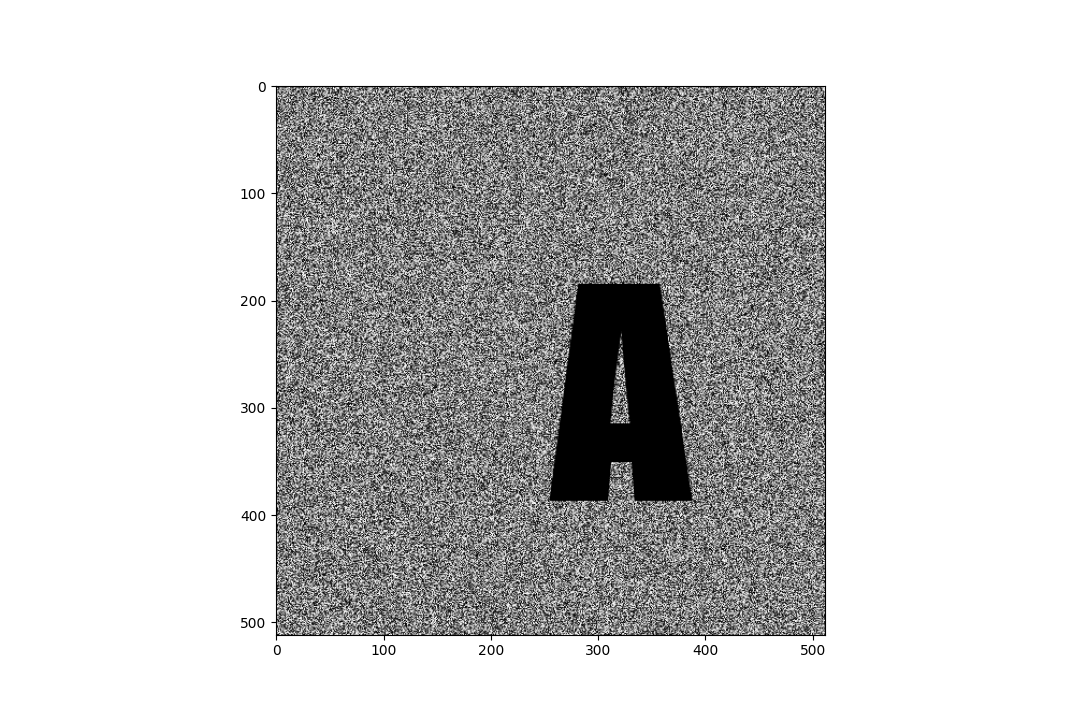

In [132]:
with new(
    'RGB', 
    size=dimensions, 
    color='white'
) as creation:
    creation = make_random_noise_bw_background(creation)
    canvas = ImageDraw.Draw(
        creation
    )
    
    font =  ImageFont.truetype(
        selected_font, size_of_text
    )

    mid_size_of_text: int = int(size_of_text/2)

    canvas.text(
        (
            center_x, 
            center_y - mid_size_of_text
        ), 
        "A", 
        font=font, 
        fill=(0, 0, 0)
    )

    image = creation.copy()

Plot.imshow(
    image
)
Plot.show()